In [16]:
from time import time
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("train.csv", sep=",", header=None)
data2 = pd.read_csv("test.csv", sep=",", header=None)

In [18]:
print (data[:2])

         0                                                  1    2
0  id26305  This process, however, afforded me no means of...  EAP
1  id17569  It never once occurred to me that the fumbling...  HPL


In [19]:
X_train = data[1]
X_test = data2[1]
print (X_test[:2])

0    Still, as I urged our leaving Ireland with suc...
1    If a fire wanted fanning, it could readily be ...
Name: 1, dtype: object


In [20]:
labels_name = np.array(data[2]) 
print (labels_name[:6])
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(labels_name)
labels = le.transform(le.classes_)
print (labels)

['EAP' 'HPL' 'EAP' 'MWS' 'HPL' 'MWS']
[0 1 2]


In [21]:
y_train = le.transform(labels_name)
print (le.classes_)
list(le.inverse_transform(y_train[:4]))


['EAP' 'HPL' 'MWS']


['EAP', 'HPL', 'EAP', 'MWS']

In [22]:
cv_X_train, cv_X_val, cv_y_train, cv_y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

In [23]:
tfidf_clf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

In [24]:
t_X_train = tfidf_clf.fit_transform(cv_X_train)
t_X_val = tfidf_clf.transform(cv_X_val)

In [25]:
print (tfidf_clf.stop_words_)
print (len(tfidf_clf.vocabulary_))

set()
174935


In [341]:
clf_MNB = MultinomialNB(alpha=.1)

In [342]:
clf_MNB.fit(t_X_train, cv_y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [347]:
mnb_pred = clf_MNB.predict(t_X_val)

In [348]:
mnb_mean = np.mean(pred == cv_y_val)
print (mnb_mean)

0.846527068437


In [349]:
mnb_c_matrix = metrics.confusion_matrix(cv_y_val , mnb_pred)
print('Confusion Matrix:')
print(mnb_c_matrix)

Confusion Matrix:
[[1425   56  119]
 [ 197  832   73]
 [ 125   31 1058]]


In [420]:
mnb_im = plt.imshow(mnb_c_matrix, cmap=plt.cm.binary)
plt.title('Multinomial Naive Bayes')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)

([<matplotlib.axis.YTick at 0x163c8632b70>,
 <a list of 3 Text yticklabel objects>)

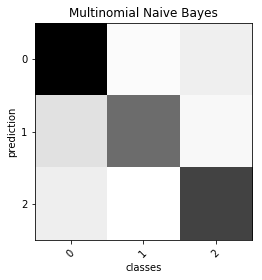

In [421]:
plt.show()

In [345]:
pred_prob = clf_MNB.predict_proba(t_X_val)

In [346]:
print (pred_prob[:10])

[[ 0.07514378  0.86615295  0.05870327]
 [ 0.31219762  0.19008116  0.49772122]
 [ 0.16449171  0.01150911  0.82399919]
 [ 0.03291869  0.13701727  0.83006404]
 [ 0.1499502   0.02951027  0.82053953]
 [ 0.53875149  0.1736127   0.2876358 ]
 [ 0.73375065  0.01222292  0.25402643]
 [ 0.36823394  0.16316453  0.46860153]
 [ 0.97169864  0.00690928  0.02139208]
 [ 0.96919156  0.01624223  0.01456621]]


In [704]:
MNB_scores = cross_val_score(clf_MNB, t_X_val, cv_y_val, cv=20)

In [ ]:
print (MNB_scores)

In [399]:
clf_xg = XGBClassifier(n_jobs=-1, booster='gblinear')

In [400]:
clf_xg.fit(t_X_train, cv_y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [401]:
xg_pred = clf_xg.predict(t_X_val)

In [402]:
print (np.mean(xg_pred == cv_y_val))

0.801072522983


In [403]:
xg_c_matrix = metrics.confusion_matrix(cv_y_val , xg_pred)
print('Confusion Matrix:')
print(xg_c_matrix)

Confusion Matrix:
[[1351  111  138]
 [ 184  825   93]
 [ 165   88  961]]


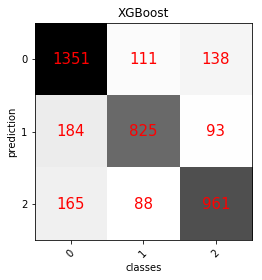

In [453]:
xg_im = plt.imshow(xg_c_matrix, cmap=plt.cm.binary)
plt.title('XGBoost')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.text(0,0,'1351',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(1,0,'111',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(2,0,'138',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(0,1,'184',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(1,1,'825',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(2,1,'93',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(0,2,'165',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(1,2,'88',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(2,2,'961',
            va='center',
            ha='center', color='r', fontsize=15)
plt.show()

In [18]:
clf_xg.predict_proba(t_X_val)

array([[ 0.05373774,  0.90407157,  0.04219068],
       [ 0.41418394,  0.20452832,  0.38128781],
       [ 0.06382454,  0.02878018,  0.9073953 ],
       ..., 
       [ 0.77026862,  0.14203845,  0.08769292],
       [ 0.01324696,  0.95579177,  0.0309613 ],
       [ 0.6523304 ,  0.18395059,  0.16371906]], dtype=float32)

In [ ]:
xg_pred = clf_xg.predict(t_X_val)

In [ ]:
xg_mean = np.mean(xg_pred == cv_y_val)

In [ ]:
print (xg_mean)

In [300]:
clf_rf = RandomForestClassifier(n_jobs=-1)

In [301]:
clf_rf.fit(t_X_train, cv_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [302]:
rf_pred = clf_rf.predict(t_X_val)

In [303]:
print (np.mean(rf_pred == cv_y_val))

0.666241062308


Confusion Matrix:
[[1267  136  197]
 [ 384  600  118]
 [ 356  116  742]]


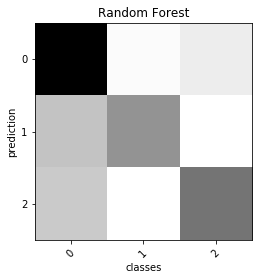

In [422]:
rf_c_matrix = metrics.confusion_matrix(cv_y_val , rf_pred)
print('Confusion Matrix:')
print(rf_c_matrix)
rf_im = plt.imshow(rf_c_matrix, cmap=plt.cm.binary)
plt.title('Random Forest')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.show()

In [583]:
clf_rf.predict_proba(t_X_val)

array([[ 0.5,  0.3,  0.2],
       [ 0.5,  0. ,  0.5],
       [ 0.7,  0. ,  0.3],
       ..., 
       [ 0.1,  0.2,  0.7],
       [ 0.5,  0.1,  0.4],
       [ 0.4,  0.2,  0.4]])

In [ ]:
rf_pred = clf_rf.predict(t_X_val)

In [ ]:
rf_mean = np.mean(rf_pred == cv_y_val)
print (rf_mean)

In [405]:
print (le.inverse_transform([0]))
print (le.inverse_transform([1]))
print (le.inverse_transform([2]))

['EAP']
['HPL']
['MWS']


In [304]:
clf_svc = SVC(kernel='linear', C=1, cache_size=10000)

In [305]:
clf_svc.fit(t_X_train, cv_y_train)

SVC(C=1, cache_size=10000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [306]:
scv_pred = clf_svc.predict(t_X_val)

In [307]:
svc_mean = np.mean(scv_pred == cv_y_val)
print (svc_mean)

0.803626149132


In [406]:
svc_c_matrix = metrics.confusion_matrix(cv_y_val , scv_pred)
print('Confusion Matrix:')
print(svc_c_matrix)

Confusion Matrix:
[[1285  147  168]
 [ 157  861   84]
 [ 137   76 1001]]


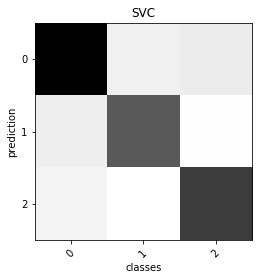

In [407]:
svc_im = plt.imshow(svc_c_matrix, cmap=plt.cm.binary)
plt.title('SVC')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.show()

In [310]:
svc_clf = SVC(kernel='linear', C=1, cache_size=10000)

In [311]:
clf_gs = GridSearchCV(svc_clf, n_jobs=-1, param_grid={'C':[1]})

In [312]:
clf_gs.fit(t_X_train, cv_y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=10000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1, param_grid={'C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [313]:
gs_pred = clf_gs.predict(t_X_val)

In [314]:
gs_mean = np.mean(gs_pred == cv_y_val)
print (gs_mean)

0.803626149132


Confusion Matrix:
[[1285  147  168]
 [ 157  861   84]
 [ 137   76 1001]]


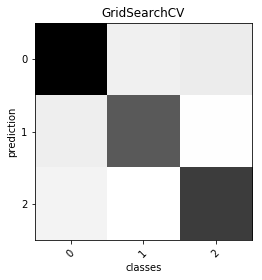

In [408]:
gs_c_matrix = metrics.confusion_matrix(cv_y_val , gs_pred)
print('Confusion Matrix:')
print(gs_c_matrix)
gs_im = plt.imshow(svc_c_matrix, cmap=plt.cm.binary)
plt.title('GridSearchCV')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.show()

In [742]:
clf_gs.cv_results_

{'mean_fit_time': array([ 53.60824831,  51.02762882]),
 'mean_score_time': array([ 18.35901403,  17.42720675]),
 'mean_test_score': array([ 0.80693354,  0.80323054]),
 'mean_train_score': array([ 0.95514908,  0.98068697]),
 'param_C': masked_array(data = [1 2],
              mask = [False False],
        fill_value = ?),
 'params': ({'C': 1}, {'C': 2}),
 'rank_test_score': array([1, 2]),
 'split0_test_score': array([ 0.80846581,  0.80176211]),
 'split0_train_score': array([ 0.9548937 ,  0.98190002]),
 'split1_test_score': array([ 0.80712507,  0.8050182 ]),
 'split1_train_score': array([ 0.95537253,  0.98170848]),
 'split2_test_score': array([ 0.80520973,  0.80291132]),
 'split2_train_score': array([ 0.955181 ,  0.9784524]),
 'std_fit_time': array([ 1.7391588 ,  1.13223596]),
 'std_score_time': array([ 0.4815225 ,  0.50111376]),
 'std_test_score': array([ 0.00133617,  0.00134832]),
 'std_train_score': array([ 0.00019678,  0.00158201])}

In [411]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [412]:
clf_dt.fit(t_X_train, cv_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [413]:
dt_pred = clf_dt.predict(t_X_val)

In [414]:
dt_mean = np.mean(dt_pred == cv_y_val)
print (dt_mean)

0.526046986721


Confusion Matrix:
[[835 489 276]
 [275 686 141]
 [304 371 539]]


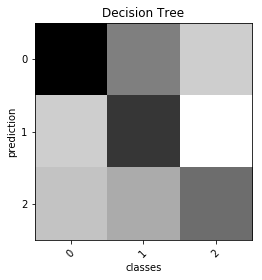

In [415]:
dt_c_matrix = metrics.confusion_matrix(cv_y_val , dt_pred)
print('Confusion Matrix:')
print(dt_c_matrix)
dt_im = plt.imshow(dt_c_matrix, cmap=plt.cm.binary)
plt.title('Decision Tree')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.show()

In [327]:
ada_clf = AdaBoostClassifier(clf_dt, n_estimators=200)

In [328]:
ada_clf.fit(t_X_train, cv_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [329]:
ada_pred = ada_clf.predict(t_X_val)

In [330]:
ada_mean = np.mean(ada_pred == cv_y_val)
print (ada_mean)

0.61746680286


Confusion Matrix:
[[1132  152  316]
 [ 400  513  189]
 [ 359   82  773]]


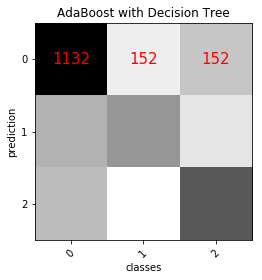

In [450]:
ada_c_matrix = metrics.confusion_matrix(cv_y_val , ada_pred)
print('Confusion Matrix:')
print(ada_c_matrix)
ada_im = plt.imshow(ada_c_matrix, cmap=plt.cm.binary)
plt.title('AdaBoost with Decision Tree')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, labels)
plt.text(0,0,'1132',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(1,0,'152',
            va='center',
            ha='center', color='r', fontsize=15)
plt.text(2,0,'152',
            va='center',
            ha='center', color='r', fontsize=15)
plt.show()

In [176]:

print ('before clf')
t0 = time()

print ("Fitting time:"), round(time()-t0, 3), "s"

before clf
Fitting time:


(None, 0.0, 's')